# Importing

In [1]:
import numpy as np
import pandas as pd
import itertools as it
import statsmodels.api as sm
import statsmodels.formula.api as smf


from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from  matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy
import scipy.stats as stats
import GRIN_analysis_tools as ga

from path import Path
import warnings
from warnings import warn
from collections import OrderedDict
import itertools
from scipy.integrate import simps
from numpy import trapz
from sklearn.metrics import auc
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [2]:
# export_path = '/Volumes/lab-kohlj/home/shared/projects/pregnancy_2021/Figure_4/linked_figure_4/' 
export_path = 'output_figures/' 

# Number of neurons detected

## Vir vs D18 vs D50

In [3]:
path = 'dataset/'
# Experimental conditions
states = ['virgin', 'virgin_second', 'PD18', 'PD50']

# Analysis parameters

IDs = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.5d', 'JKAA40.4h', 'JKAA44.2i', 'JKAA48.3d', 'JKAA44.2e', 'JKAA48.3b', 'JKAA45.6h']

numbers = pd.DataFrame(columns = ['State', 
                                  'IDs', 
                                  'num_neuron'])
convolve = 'non_convolved'

for state in states:

    for ID in IDs:
         
        try:
            
            df = ga.load_inscopix(path + f'{ID}/{convolve}/{ID}_registered_{state}'+'.csv', normalisation='fixed interval')
        
        except FileNotFoundError:
            
            warnings.warn(f'Recording {ID}_{state} was not found')
            continue
            
            
        num_neuron = df.shape[0]
        
        number = {}
        number['State'] = [state]
        number['IDs'] = [ID]
        number['num_neuron'] = [num_neuron]
        
        number = pd.DataFrame(number)
        numbers = pd.concat([numbers, number])

In [4]:
numbers.to_csv('generated_dataset/numbers.csv')

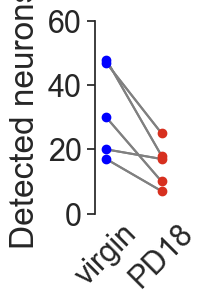

In [4]:
sns.set(font_scale=2) 
sns.set_style("ticks")
id_list = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.5d', 'JKAA40.4h', 'JKAA44.2i']
ga.condition_pairplot(numbers, id_list, ['virgin', 'PD18'])
# plt.savefig(export_path +'number_detected_neurons.pdf', dpi = 300, bbox_inches='tight')
# plt.savefig(export_path +'number_detected_neurons.png', dpi = 300, bbox_inches='tight')

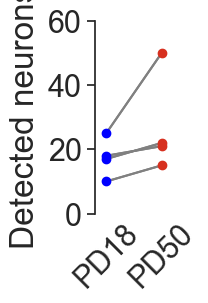

In [6]:
id_list = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.4h', 'JKAA44.2i'] # not JKAA40.5d?
ga.condition_pairplot(numbers, id_list, ['PD18', 'PD50'])
# plt.savefig(export_path +'number_detected_neurons_.pdf', dpi = 300, bbox_inches='tight')

In [7]:
# reformat & prune df
numbers.reset_index(drop=True, inplace=True)
numbers1 = numbers.drop(np.r_[6:9,9:13])

id_list = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.5d', 'JKAA40.4h', 'JKAA44.2i']
numbers1 = numbers1[numbers1['IDs'].isin(id_list)]

lenVir = len(numbers1[(numbers1['State'] == 'virgin')])
lenD18 = len(numbers1[(numbers1['State'] == 'PD18')])
lenD50 = len(numbers1[(numbers1['State'] == 'PD50')])

numbers1

,State,IDs,num_neuron
0,virgin,JKAA40.3e,20
1,virgin,JKAA40.4i,47
2,virgin,JKAA40.5d,17
3,virgin,JKAA40.4h,48
4,virgin,JKAA44.2i,30
13,PD18,JKAA40.3e,17
14,PD18,JKAA40.4i,25
15,PD18,JKAA40.5d,7
16,PD18,JKAA40.4h,18
17,PD18,JKAA44.2i,10


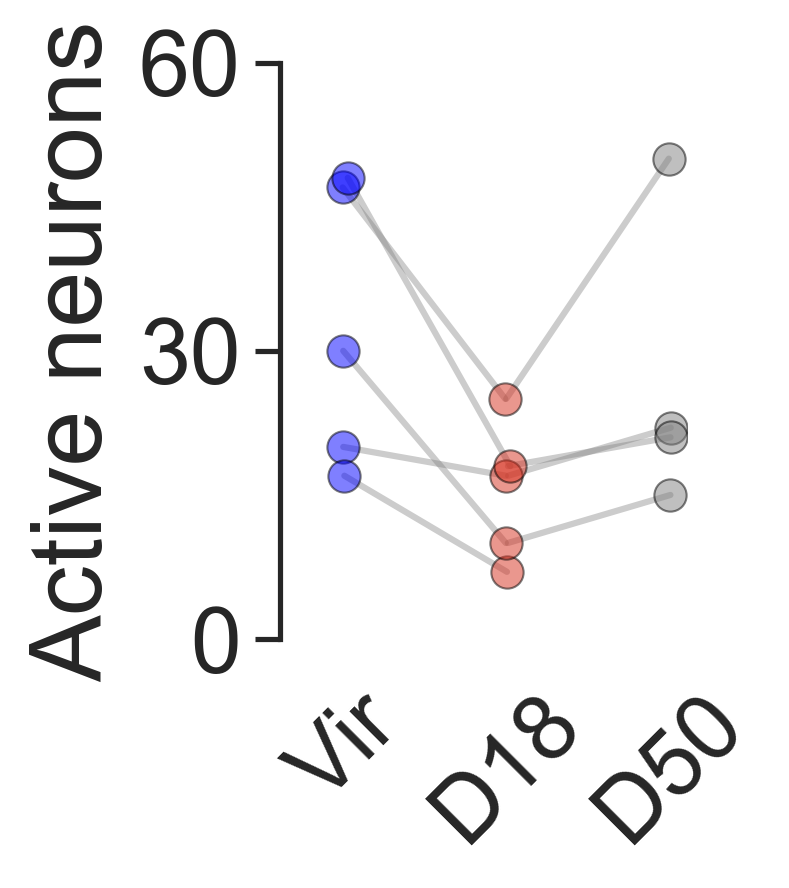

In [9]:
# PAIRED PLOT WITH VIR-D18-D50
sns.set(rc={"figure.figsize": (1.75, 2.5)})
plt.rcParams['figure.dpi'] = 300
sns.set(font_scale=2) 
sns.set_style("ticks")

# add lineplots; first add x values = number of mice in each group
arr = np.random.normal(0, 0.02, lenVir) #for jitter: generate random numbers for n number of mice
arr50 = np.random.normal(0, 0.02, lenD50) # we need a separate one for D50 because there's only 4 mice at this stage, not 5 as in Vir/D18
arr_y = np.random.normal(0, 0, lenVir)
arr_y50 = np.random.normal(0, 0, lenD50)

x1 = np.zeros(lenVir)+arr
x2 = np.ones(lenD18)+arr
x23 = np.ones(lenD50)+arr50 # this one is necessary b/c there will be fewer lines from D18 to D50
x3 = np.zeros(lenD50)+arr50+2

# then extract the corresponding y values
y1 = numbers1[(numbers1['State'] == 'virgin')].num_neuron + arr_y
y2 = numbers1[(numbers1['State'] == 'PD18')].num_neuron + arr_y
unwanted_num = {7.0} # remove row for JKAA40.5d b/c this mouse does not have a D50 recording
y23 = [ele for ele in y2 if ele not in unwanted_num] 
y3 = numbers1[(numbers1['State'] == 'PD50')].num_neuron + arr_y50

plt.scatter(x1, y1, color='#0000ff', linewidth=0.5, edgecolor='black', s=60, alpha=0.5)
plt.scatter(x2, y2, color='#d7301f', linewidth=0.5, edgecolor='black', s=60, alpha=0.5)
plt.scatter(x3, y3, color='gray', linewidth=0.5, edgecolor='black', s=60, alpha=0.5)

plt.ylabel('Active neurons')
plt.ylim(-0.1,60)
plt.xlim(-0.4, )

# plotting the lines
plt.plot( [x1,x2], [y1,y2], color='grey', alpha=.4, zorder=0)
plt.plot( [x23,x3], [y23,y3], color='grey', alpha=.4, zorder=0)

# plot x ticks and labels btw bars
cats = np.array(['Vir', 'D18', 'D50'])
u = np.arange(len(cats))
plt.xticks(u, cats, rotation=45)
plt.yticks([0, 30, 60])
# sns.despine()
sns.despine(bottom=True, trim=True)
plt.tick_params(bottom=False)
# plt.savefig(export_path + 'detected_neurons_VirD18D50.pdf', dpi = 300, bbox_inches='tight', transparent=True)

## Vir T1 vs T2

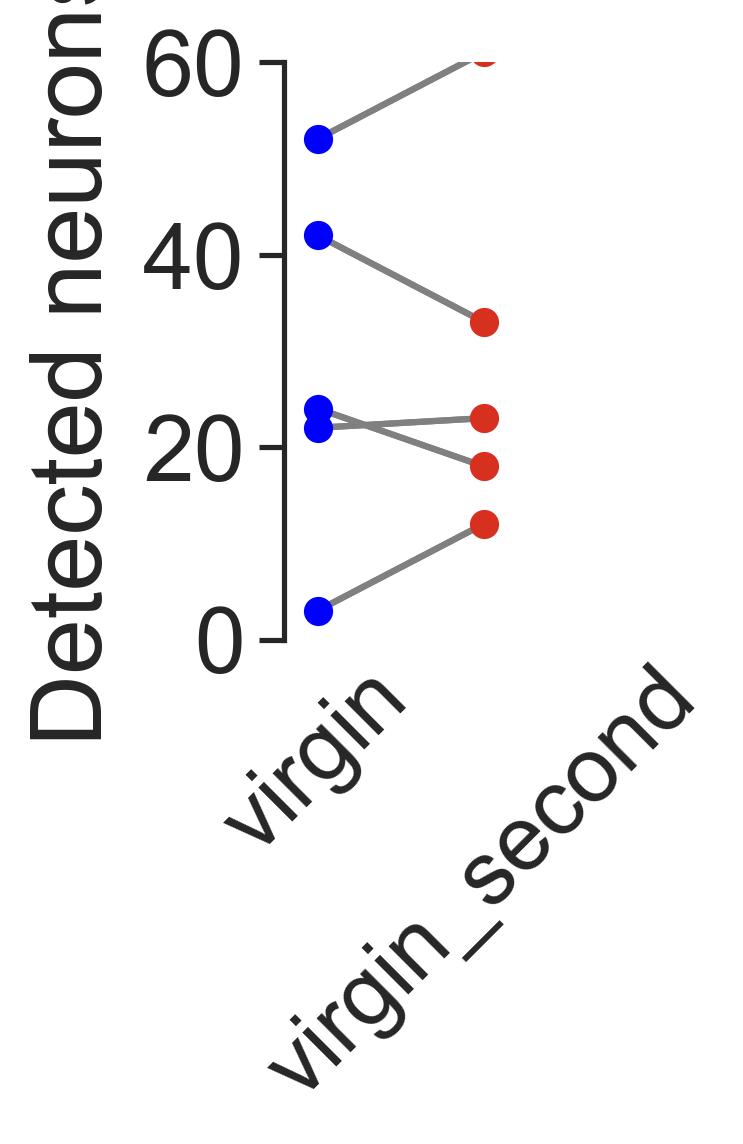

In [16]:
vir_num = numbers.copy()
vir_num = vir_num.reset_index()
vir_num = vir_num.iloc[:, 1:]
vir_num = vir_num.drop(4)
vir_num = pd.concat([vir_num, pd.DataFrame({'State': 'virgin', 'IDs':'JKAA44.2i', 'num_neuron':3}, index = [0])])
vir_num = pd.concat([vir_num, pd.DataFrame({'State': 'virgin_second', 'IDs':'JKAA44.2i', 'num_neuron':12}, index = [0])])

vir_second = ['JKAA48.3d', 'JKAA44.2e', 'JKAA48.3b', 'JKAA45.6h', 'JKAA44.2i']
id_list = vir_second

ga.condition_pairplot(vir_num, id_list, ['virgin', 'virgin_second'])
# plt.savefig(export_path +'number_detected_neurons_Vir-Vir.pdf', dpi = 300, bbox_inches='tight')

In [17]:
# reorder df 
vir_num2 = vir_num.sort_values(['State','IDs'],ascending=[False,False]).reset_index(drop=True)
vir_num3 = vir_num2.loc[0:9]
lenVir1 = len(vir_num3[(vir_num3['State'] == 'virgin')])
lenVir2 = len(vir_num3[(vir_num3['State'] == 'virgin_second')])

_, p = stats.ttest_rel(vir_num3[vir_num3.State == 'virgin'].num_neuron, 
                       vir_num3[vir_num3.State == 'virgin_second'].num_neuron)
print(p)
vir_num3

0.8402541376912023


,State,IDs,num_neuron
0,virgin_second,JKAA48.3d,61
1,virgin_second,JKAA48.3b,23
2,virgin_second,JKAA45.6h,18
3,virgin_second,JKAA44.2i,12
4,virgin_second,JKAA44.2e,33
5,virgin,JKAA48.3d,52
6,virgin,JKAA48.3b,22
7,virgin,JKAA45.6h,24
8,virgin,JKAA44.2i,3
9,virgin,JKAA44.2e,42


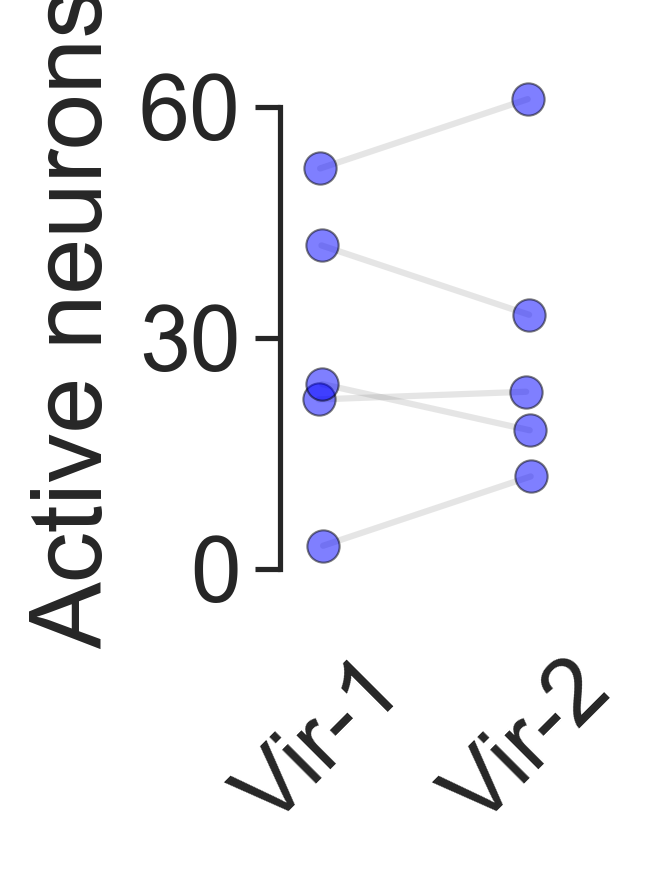

In [19]:
# PAIRED PLOT 
sns.set(rc={"figure.figsize": (1.25, 2.5)})
plt.rcParams['figure.dpi'] = 300
sns.set(font_scale=2) 
sns.set_style("ticks")

# add lineplots; first add x values = number of mice in each group
arr = np.random.normal(0, 0.01, lenVir1) #for jitter: generate random numbers for n number of mice
arr_y = np.random.normal(0, 0, lenVir1)

x1 = np.zeros(lenVir1)+arr
x2 = np.ones(lenVir2)+arr

# then extract the corresponding y values
y1 = vir_num3[(vir_num3['State'] == 'virgin')].num_neuron + arr_y
y2 = vir_num3[(vir_num3['State'] == 'virgin_second')].num_neuron + arr_y

plt.scatter(x1, y1, color='#0000ff', linewidth=0.5, edgecolor='black', s=60, alpha=0.5)
plt.scatter(x2, y2, color='#0000ff', linewidth=0.5, edgecolor='black', s=60, alpha=0.5)

plt.ylabel('Active neurons')
plt.ylim(-5,70)
plt.xlim(-0.2,1.2 )

# plotting the lines
plt.plot( [x1,x2], [y1,y2], color='grey', alpha=.2, zorder=0)

# plot x ticks and labels btw bars
cats = np.array(['Vir-1', 'Vir-2']) 
u = np.arange(len(cats))
plt.xticks(u, cats, rotation=45)
plt.yticks([0, 30, 60])
sns.despine(bottom=True, trim=True)
plt.tick_params(bottom=False)
# plt.savefig(export_path + 'detected_neurons_Vir1Vir2.pdf', dpi = 300, bbox_inches='tight', transparent=True)

In [20]:
id_list = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.5d', 'JKAA40.4h', 'JKAA44.2i']
id_list2 = ['JKAA40.3e', 'JKAA40.4i', 'JKAA40.4h', 'JKAA44.2i']


numbers = numbers[numbers.IDs.isin(id_list)]
_, p = stats.ttest_rel(numbers[numbers.State == 'virgin'].num_neuron, 
                       numbers[numbers.State == 'PD18'].num_neuron)
print(p)
numbers = numbers[numbers.IDs.isin(id_list2)]
_, p = stats.ttest_rel(numbers[numbers.State == 'virgin'].num_neuron, 
                       numbers[numbers.State == 'PD50'].num_neuron)

0.022922841765157097
